# Stock_Price_Prediction_Using_LSTM

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Stocks_dataset.csv")
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [3]:
#Shape of Data
df.shape

(1258, 14)

In [4]:
#Statistical Descritpion
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [5]:
#Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [6]:
#Check Null values
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [7]:
#No null values in data
df = df[['date','open','close']] #Require columns extracting
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) #Convert to datetime dtype
df.set_index('date', drop=True, inplace=True)
df.head()

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


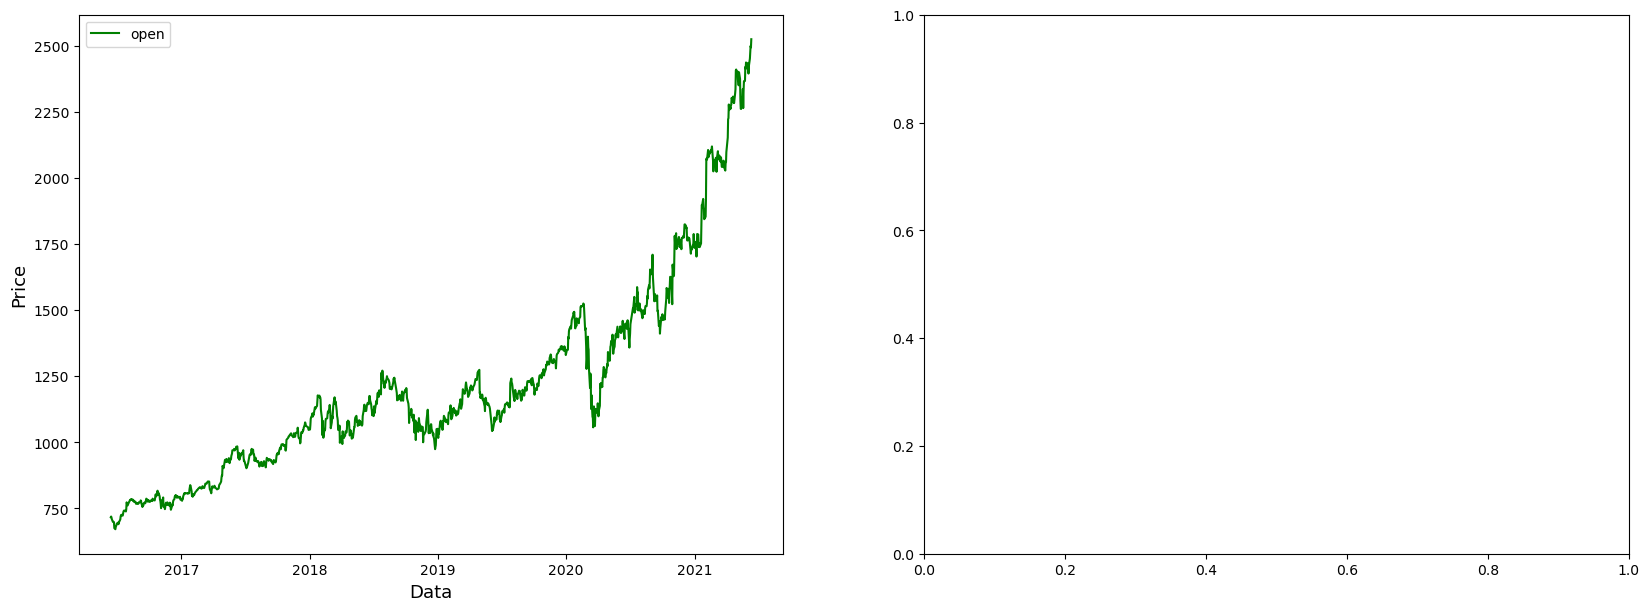

In [11]:
# Now we plotting open and closing price on date index
fig, ax = plt.subplots(1,2, figsize=(20,7))
ax[0].plot(df['open'], label = 'open', color = 'green')
ax[0].set_xlabel('Data', size=13)
ax[0].set_ylabel('Price', size=13)
ax[0].legend()
plt.show()

ax[1].plot(df['close'], label = 'Close', color = 'red')
ax[1].set_xlabel('Data', size=13)
ax[1].set_ylabel('Price', size=13)
ax[1].legend()
plt.show()

### Data Preprocessing

In [12]:
# we'll normalizing all the values of all columns using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df[df.columns] = mms.fit_transform(df)
df.head()

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732


In [13]:
#split data into Training and testing
training_size = round(len(df) * 0.75) #75% for training
training_size

944

In [14]:
training_data = df[:training_size]
testing_data = df[training_size:]
training_data.shape, testing_data.shape

((944, 2), (314, 2))

In [15]:
# we'll create sequence of data for training and testing

def create_sequence(dataset):
    sequence = []
    labels = []
    
    start_idx = 0
    
    for stop_idx in range(50, len(dataset)): #selecting 50 rows at a time
        sequence.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1
    return (np.array(sequence), np.array(labels))

In [16]:
train_seq, train_label, = create_sequence(training_data)
test_seq, test_label = create_sequence(testing_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

### Create LSTM Model

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [18]:
#import Sequential from keras.models
model = Sequential()
#import Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs = 100, validation_data = (test_seq, test_label), verbose = 1)

Epoch 1/100
28/28 [==============================] - 1s 37ms/step - loss: 9.2888e-05 - mean_absolute_error: 0.0067 - val_loss: 0.0016 - val_mean_absolute_error: 0.0297
Epoch 2/100
28/28 [==============================] - 1s 36ms/step - loss: 9.5534e-05 - mean_absolute_error: 0.0068 - val_loss: 0.0025 - val_mean_absolute_error: 0.0394
Epoch 3/100
28/28 [==============================] - 1s 38ms/step - loss: 9.9025e-05 - mean_absolute_error: 0.0070 - val_loss: 0.0013 - val_mean_absolute_error: 0.0272
Epoch 4/100
28/28 [==============================] - 1s 36ms/step - loss: 9.4468e-05 - mean_absolute_error: 0.0069 - val_loss: 0.0026 - val_mean_absolute_error: 0.0407
Epoch 5/100
28/28 [==============================] - 1s 37ms/step - loss: 1.0877e-04 - mean_absolute_error: 0.0074 - val_loss: 0.0019 - val_mean_absolute_error: 0.0323
Epoch 6/100
28/28 [==============================] - 1s 36ms/step - loss: 1.0202e-04 - mean_absolute_error: 0.0071 - val_loss: 0.0010 - val_mean_absolute_error:

In [21]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 [==============================] - 1s 12ms/step


array([[0.4098233 , 0.4075212 ],
       [0.41005713, 0.40773788],
       [0.4094674 , 0.407063  ],
       [0.41640925, 0.41348976],
       [0.41758883, 0.41485825]], dtype=float32)

In [22]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = mms.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1430.7797, 1423.5354],
       [1431.2131, 1423.9369],
       [1430.1198, 1422.6862],
       [1442.9895, 1434.5972],
       [1445.1763, 1437.1334]], dtype=float32)

### PREDICTED DATA VS VISUALIZING ACTUAL

In [23]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-264:].index)], axis=1)

In [24]:
# Inversing normalization/scaling 
df_merge[['open','close']] = mms.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,1417.25,1417.84,1430.779663,1423.535400
2020-05-28,1396.86,1416.73,1431.213135,1423.936890
2020-05-29,1416.94,1428.92,1430.119751,1422.686157
2020-06-01,1418.39,1431.82,1442.989502,1434.597168
2020-06-02,1430.55,1439.22,1445.176270,1437.133423


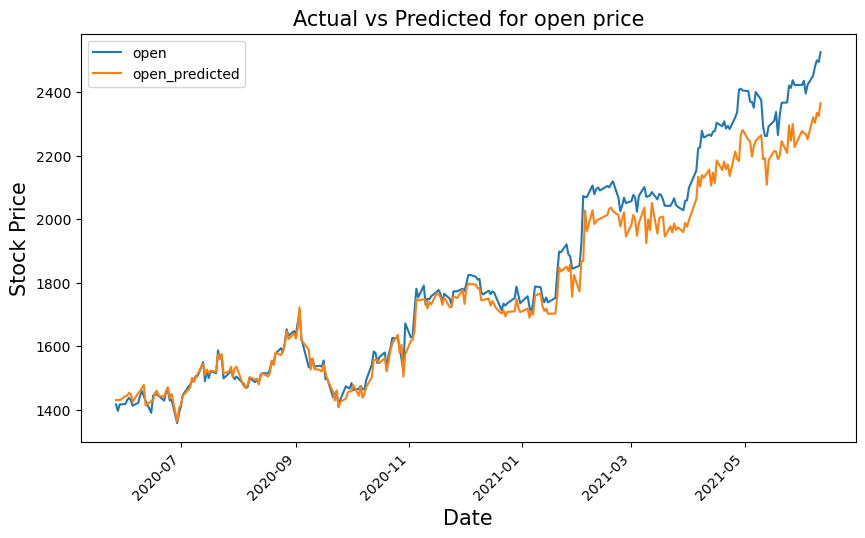

In [25]:
# plotting the actual open and predicted open prices on date index
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

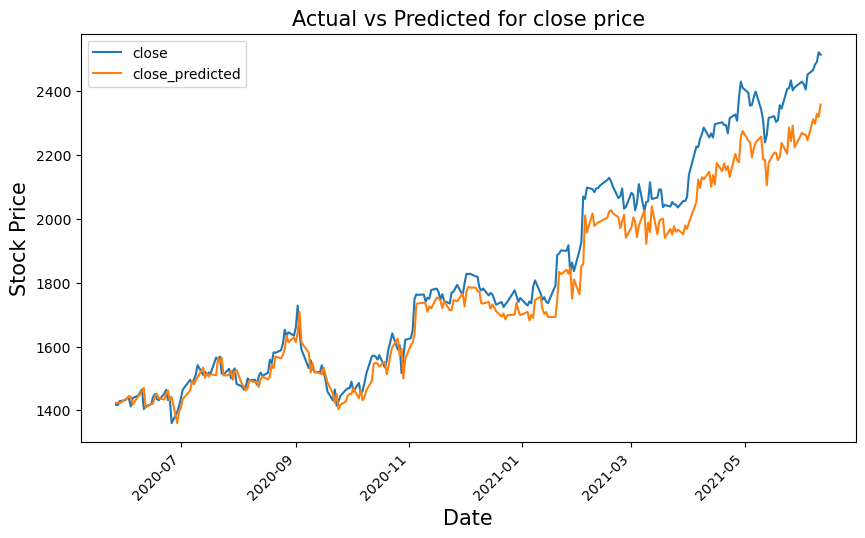

In [26]:
# plotting the actual close and predicted close prices on date index 
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

### PREDICTING UPCOMING 10 DAYS

In [27]:
# Creating a dataframe and adding 10 days to existing index 

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,2499.50,2491.40,2334.801514,2328.246826
2021-06-10,2494.01,2521.60,2323.839600,2319.044189
2021-06-11,2524.92,2513.93,2364.799561,2357.900635
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [28]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [29]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 41ms/step


In [30]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = mms.inverse_transform(upcoming_prediction[['open','close']])

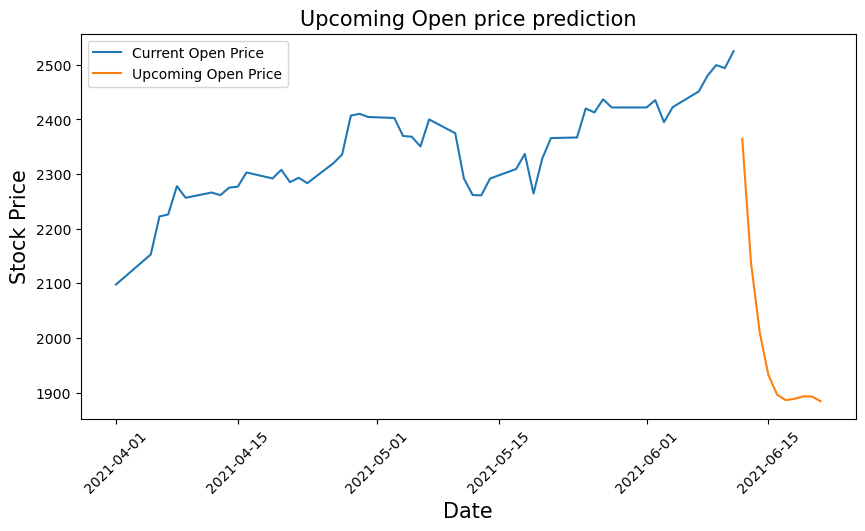

In [31]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

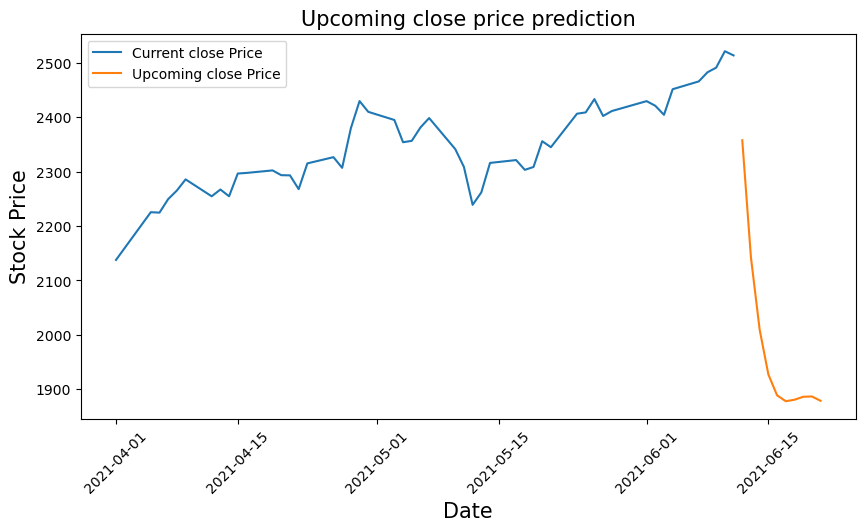

In [32]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

# THANK YOU!

### GitHub Link: https://github.com/anujtiwari21?tab=repositories